## 단순 선형 회귀

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 데이터 생성
# y = 3x + 2 + noise
# Training set
x = torch.linspace(0, 10, 100).view(-1, 1)  # 100개의 데이터를 1열로 변환
# 정답 레이블
y = 3 * x + 2 + torch.randn(100, 1) * 2  # 노이즈 추가

# 2. 선형 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개

    def forward(self, x):
        # 활성화 함수로 선형 함수 사용
        return self.linear(x)

model = LinearRegressionModel()

# 3. 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()  # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사 하강법

# 4. 학습 루프
epochs = 1000 # 하이퍼 파라미터
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    outputs = model(x)  # Training Set에 따라 예측값 계산
    loss = criterion(outputs, y)  # 레이블과 비교한 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 결과 시각화
plt.figure(figsize=(10, 5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.ylim(0,5)
plt.plot(losses)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label='Original Data')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


## 다중 선형 회귀

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 데이터 정의 (10개 샘플)
X = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)  # 입력 3개, 출력 1개

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

# 손실 함수 및 최적화 알고리즘
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# 학습
epochs = 1000
loss_history = []
for epoch in range(epochs):
    predictions = model(X)
    loss = loss_function(predictions, y)
    loss_history.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 학습 결과 확인
print("\n학습된 모델의 파라미터:")
print(f"Weights: {model.linear.weight.data}")
print(f"Bias: {model.linear.bias.data}")

# 시각화: 손실값 변화
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

# 실제 값과 예측 값 비교
predicted = model(X).detach().numpy()
actual = y.numpy()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(actual)), actual, label='Actual', color='blue', s=100)
plt.scatter(range(len(predicted)), predicted, label='Predicted', color='red', s=100)
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

## 로지스틱스 회귀

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# 데이터 셋 만들기
np.random.seed(42)
num_samples = 1000

mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1, 0], [0, 1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)

mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1, 0], [0, 1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples // 2)

data = np.vstack((data_1, data_2)) # 세로로 행렬 결합
labels = np.ones(num_samples)
labels[num_samples // 2:] = 0

# print(len(data_1))
# print(len(data_2))
# print(len(data))

# Convert data and labels to PyTorch Variables
# torch 데이터로 변환
data = torch.from_numpy(data).float()
labels = torch.from_numpy(labels).float()
labels = labels.view(-1, 1) ## reshape와 같은 함수
num_samples, num_features = data.shape

print("data_1.shape",data_1.shape)
print("data_2.shape",data_2.shape)
print("data.shape",data.shape)

# 로지스틱 회귀 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim) # 입력 차원을 정의

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out) # 활성화 함수 적용
        return out

# Initialize model, loss function, and optimizer
learning_rate = 0.01
num_epochs = 1000
input_dim = num_features
output_dim = 1
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train model
loss_history = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels) # 여기서는 정답이 labels
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, loss.data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# print("w", w)
# print("b", b)
# Plot decision boundary
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()

x_plot = np.array([-2, 2])
y_plot = (-b - w[0][0]*x_plot) / w[0][1]    #  0 = w1 x1 + w2 x2 + b
plt.plot(x_plot, y_plot, color='g', label='Decision boundary')
plt.scatter(data_1[:, 0], data_1[:, 1], color='b', label='Class 1')
plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='Class 0')
plt.legend()
plt.show()

for name, params in model.named_parameters():
    print(f"{name}: {params.data}")

### FashionMNIST 신경망

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# 훈련과 테스트를 진행할 예정
# GPU도 사용할 예정
# 설명 : BN적용, relu 적용
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 입력층
            torch.nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256), # Layer2
            torch.nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64), # Layer3
            torch.nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10), # 출력층
        )

    def forward(self, x):
        x = self.flatten(x)
        # activation -> relu
        logits = self.linear_relu_stack(x)
        return logits

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

print(train_dataloader.dataset)
print(test_dataloader.dataset)

# 모델 정의
model = NeuralNetwork()
model.to(device)
print(model)

learning_rate = 0.001
epochs = 10

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        X, y = X.to(device), y.to(device)  # 데이터를 디바이스로 이동
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X) # len(X)는 batch size인 64
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0 # loss의 합과 얼마나 정확히 맞췄는지

    with torch.no_grad(): # 모델 테스트에서는 가중치를 업데이트하지 않는다.
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)  # 데이터를 디바이스로 이동
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # pred에는 클래스별 정답이 들어있고 그중 가장 높은 점수를 받은 것이 결과값
            # 결과값이 y와 일치하면 정답!
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 레이블에 대응하는 태그
label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15, 15))

# batch size와 다른사이즈(ex:1개)를 테스트 할경우에는 eval 호출 필요
model.eval()  # 모델을 평가 모드로 변경

for i in range(1, columns * rows + 1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img, label = test_data[data_idx][0].to(device), test_data[data_idx][1]

    # 이미지 예측
    with torch.no_grad():
        output = model(input_img)
        _, prediction = torch.max(output, 1)
        pred_class = label_tags[prediction.item()]
        true_class = label_tags[label]

    # 제목과 색상 설정
    title = f'{pred_class}, right !' if pred_class == true_class else f'Not {pred_class} but {true_class}'
    cmap = 'Blues' if pred_class == true_class else 'Reds'

    fig.add_subplot(rows, columns, i)
    plot_img = input_img.squeeze().cpu().numpy()  # 텐서를 넘파이 배열로 변환하여 이미지 플로팅
    plt.imshow(plot_img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# 데이터 전처리 (Normalization)
# Normalize : RGB에 대해 평균과 표준편차를 조정((mean), (std))
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(32, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR-10 데이터 로드
# 10개의 클래스로 구성된 32*32 60000개 컬러 이미지
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# num_workers = 2 -> 데이터 로드시 병렬작업수행
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# 간단한 CNN 모델 정의
# 합성곱 레이어를 두층을 사용
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # in_channels, out_channels, kernel_size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # F.relu가 더 간단함
        x = self.pool(F.relu(self.conv1(x)))  # 32 -> 28 -> 14
        x = self.pool(F.relu(self.conv2(x)))  # 14 -> 10 -> 5
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 학습하기
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / i}")

print("학습 완료")

# 테스트하기
correct = 0
total = 0
with torch.no_grad(): # test는 기울기 계산 X
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Loss: 2.3062135069547054
Epoch 2, Loss: 2.291852945316292
Epoch 3, Loss: 2.1857994360054183
Epoch 4, Loss: 2.0481521932777755
Epoch 5, Loss: 1.9663590436469098
Epoch 6, Loss: 1.8658134249264826
Epoch 7, Loss: 1.7835991836501983
Epoch 8, Loss: 1.737103475597435
Epoch 9, Loss: 1.6922090674688917
Epoch 10, Loss: 1.6552371285960288
학습 완료
Accuracy: 40.0%


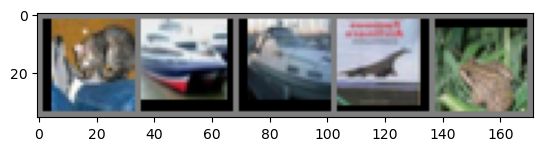

Predicted:  cat car car ship bird


In [52]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize, 0~1범위의 이미지를 -1~1의 범위로 사용했기 때문에 -0.5 -> *2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 이미지 차원 변경 torch (채널, 높이, 너비) -> plt (높이, 너비, 채널)
    plt.show()

def visualize_predictions(model, test_loader, num_images=5):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    # 이미지 출력
    imshow(torchvision.utils.make_grid(images[:num_images]))

    # 모델 예측
    images = images.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

    # 레이블 정의
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 예측 결과 출력
    print("Predicted: ", " ".join(classes[predicted[j]] for j in range(num_images)))

visualize_predictions(model, test_loader, num_images=5)